In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def genera_data(d,n=50):
  data = [np.random.normal(0, 1, size=d) for i in range(n)]
  return np.array(data)
def prod(X,Y):
  m_X = np.mean(X,axis=0)
  result_X = np.dot(X,m_X.T)
  result_Y = np.dot(Y,m_X.T)
  return result_X,result_Y
def best_t(result_X,result_Y,n=50):
  acc = 0
  t = None
  for i in result_X:
    count = 0
    for j in result_X:
      if j >= i:
        count += 1
    for k in result_Y:
      if k < i:
        count += 1
    if count/(2*n)*100 > acc:
      acc = count/(2*n)*100
      t = i
  for i in result_Y:
    count = 0
    for j in result_X:
      if j >= i:
        count += 1
    for k in result_Y:
      if k < i:
        count += 1
    if count/(2*n)*100 > acc:
      acc = count/(2*n)*100
      t = i
  return t, acc
def general(result_X,result_Y,t,n=50):
  count = 0
  for j in result_X:
    if j >= t:
      count += 1
  for k in result_Y:
    if k < t:
      count += 1
  return count/(2*n)*100

Text(0.5, 1.0, 'generaliz one')

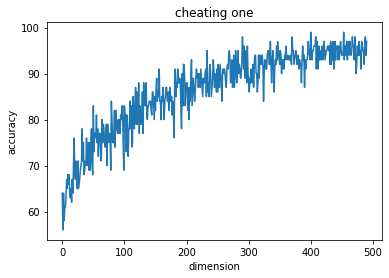

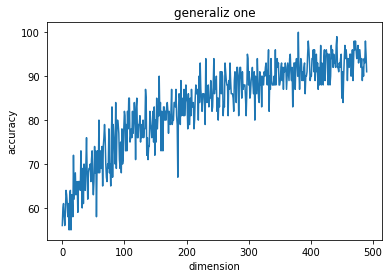

In [ ]:
orig_acc = []
general_acc = []
for d in range(10,501):
  X = genera_data(d)
  Y = genera_data(d)
  result_X,result_Y = prod(X,Y)
  t,acc = best_t(result_X,result_Y)
  orig_acc.append(acc)
  X = genera_data(d)
  Y = genera_data(d)
  result_X,result_Y = prod(X,Y)
  general_acc.append(general(result_X,result_Y,t,n=50))
plt.figure()
plt.plot(orig_acc)
plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.title('cheating one')
plt.figure()
plt.plot(general_acc)
plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.title('generaliz one')


Text(0.5, 1.0, 'cheating one')

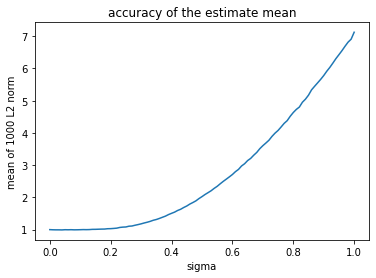

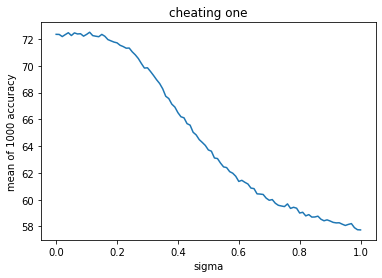

In [ ]:
def prod(X,Y,sigma):
  m_X = np.mean(X,axis=0)
  m_X = m_X + np.random.normal(0, sigma**2, size=50)
  result_X = np.dot(X,m_X.T)
  result_Y = np.dot(Y,m_X.T)
  return result_X,result_Y,m_X
sigma = np.arange(0,1.01,0.01)
mean_norm = []
orig_acc = []
for s in sigma:
  list_norm = []
  list_acc = []
  for i in range(1000):
    X = genera_data(50)
    Y = genera_data(50)
    result_X,result_Y,m = prod(X,Y,s)
    list_norm.append(np.linalg.norm(m))
    t,acc = best_t(result_X,result_Y)
    list_acc.append(acc)
  mean_norm.append(np.mean(list_norm))
  orig_acc.append(np.mean(list_acc))
plt.figure()
plt.plot(sigma,mean_norm)
plt.xlabel('sigma')
plt.ylabel('mean of 1000 L2 norm')
plt.title('accuracy of the estimate mean')
plt.figure()
plt.plot(sigma,orig_acc)
plt.xlabel('sigma')
plt.ylabel('mean of 1000 accuracy')
plt.title('cheating one')

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
train_x = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in x_train]))
test_x = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in x_test]))

In [ ]:
from sklearn.linear_model import LogisticRegression
num = [100,200,400,800,1600,2500,5000,10000]
model1 = []
model2 = []
train_acc1 = []
train_acc2 = []
test_acc1 = []
test_acc2 = []
for n in num:
  clf1 = LogisticRegression(penalty='none').fit(train_x[:n],y_train[:n])
  clf2 = LogisticRegression(penalty='l2',C=0.01).fit(train_x[:n],y_train[:n])
  model1.append(clf1)
  model2.append(clf2)
  train_acc1.append(clf1.score(train_x[:n],y_train[:n]))
  train_acc2.append(clf2.score(train_x[:n],y_train[:n]))
  test_acc1.append(clf1.score(test_x[:n],y_test[:n]))
  test_acc2.append(clf2.score(test_x[:n],y_test[:n]))

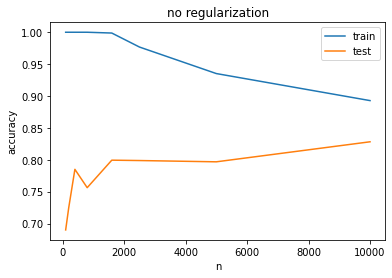

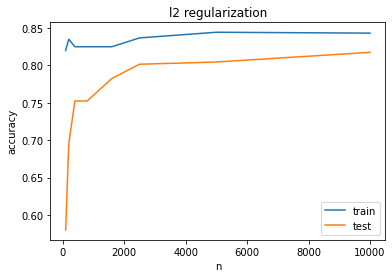

In [ ]:
plt.figure()
plt.plot(num,train_acc1)
plt.plot(num,test_acc1)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.title('no regularization')
plt.legend(('train','test'))
plt.figure()
plt.plot(num,train_acc2)
plt.plot(num,test_acc2)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.title('l2 regularization')
plt.legend(('train','test'))

In [ ]:
def attack_acc(clf,train_x,y_train,test_x,y_test,n):
  return (clf.score(train_x[:n],y_train[:n])+1-clf.score(test_x[:n],y_test[:n]))/2 

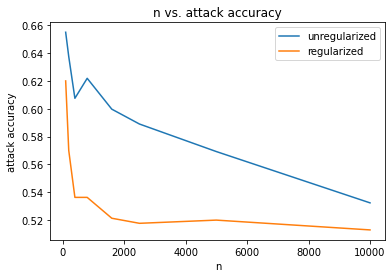

In [ ]:
unregular = []
regular = []
for i in range(len(num)):
  unregular.append(attack_acc(model1[i],train_x,y_train,test_x,y_test,num[i]))
  regular.append(attack_acc(model2[i],train_x,y_train,test_x,y_test,num[i]))
plt.figure()
plt.plot(num,unregular)
plt.plot(num,regular)
plt.xlabel('n')
plt.ylabel('attack accuracy')
plt.title('n vs. attack accuracy')
plt.legend(('unregularized','regularized'))

In [ ]:
train_acc1 = []
train_acc2 = []
test_acc1 = []
test_acc2 = []
unregular = []
regular = []
model1 = []
model2 = []
sigma2 = np.arange(0,5.01,0.2)
for s in sigma2:
  clf1 = LogisticRegression(penalty='none').fit(train_x[:400],y_train[:400])
  clf2 = LogisticRegression(penalty='l2',C=0.1).fit(train_x[:400],y_train[:400])
  for i in range(10):
    clf1.coef_[i] += np.random.normal(0, s, size=784)
    clf2.coef_[i] += np.random.normal(0, s, size=784)
  model1.append(clf1)
  model2.append(clf2)
for i in range(len(sigma2)):
  train_acc1.append(model1[i].score(train_x[:400],y_train[:400]))
  train_acc2.append(model2[i].score(train_x[:400],y_train[:400]))
  test_acc1.append(model1[i].score(test_x[:400],y_test[:400]))
  test_acc2.append(model2[i].score(test_x[:400],y_test[:400]))
  unregular.append(attack_acc(model1[i],train_x,y_train,test_x,y_test,400))
  regular.append(attack_acc(model2[i],train_x,y_train,test_x,y_test,400))

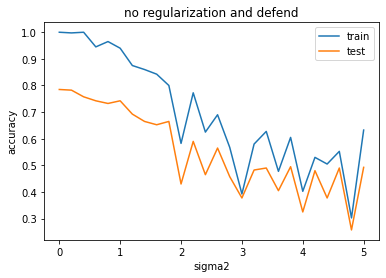

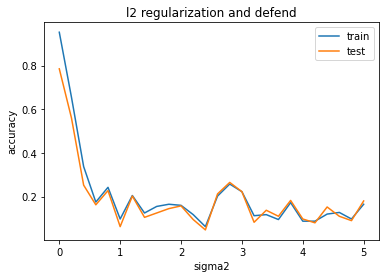

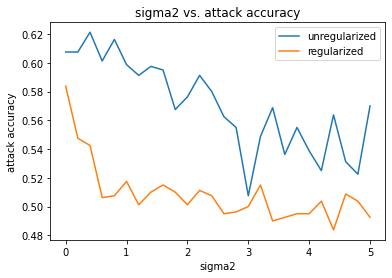

In [ ]:
plt.figure()
plt.plot(sigma2,train_acc1)
plt.plot(sigma2,test_acc1)
plt.xlabel('sigma2')
plt.ylabel('accuracy')
plt.title('no regularization and defend')
plt.legend(('train','test'))
plt.figure()
plt.plot(sigma2,train_acc2)
plt.plot(sigma2,test_acc2)
plt.xlabel('sigma2')
plt.ylabel('accuracy')
plt.title('l2 regularization and defend')
plt.legend(('train','test'))
plt.figure()
plt.plot(sigma2,unregular)
plt.plot(sigma2,regular)
plt.xlabel('sigma2')
plt.ylabel('attack accuracy')
plt.title('sigma2 vs. attack accuracy')
plt.legend(('unregularized','regularized'))